In [1]:
import numpy as np
import matplotlib.pyplot as plt
# use one of the following: qt, wx, gtk, osx, tk, inline
%matplotlib inline 

# ----- make nice figures -----
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 200

from cycler import cycler
COLORS = ['#553C67', '#F00D2C', '#4E8F00']
default_cycler = cycler(color=COLORS)
plt.rc('axes', prop_cycle=default_cycler) 
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
# -----------------------------

## Load and plot the data in x space.

Text(0.5, 1.0, 'Data in X space')

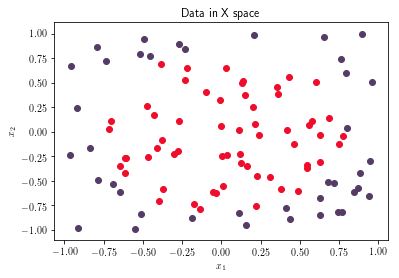

In [2]:
data = np.loadtxt('data/lec22.txt')
x = data[:,0:2]
c = data[:,2]
num_points = len(c)

# boolean indices to positively and negatively classified data
I_pos = (c == 1)
I_neg = (c == -1)

# plot points classified as positive
plt.scatter(x[I_pos,0], x[I_pos,1])

# plot points classified as negative
plt.scatter(x[I_neg,0], x[I_neg,1])

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Data in X space')

## Transform using basis functions, plot in phi-space

Text(0.5, 1.0, 'Data in $\\varphi$ space')

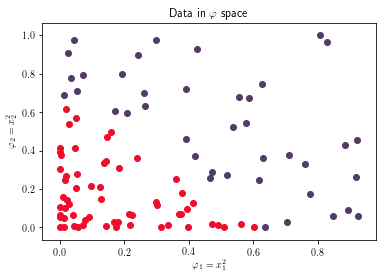

In [3]:
# We'll use phi_1 = x_1^2 and phi_2 = x_2^2
phi_1 = x[:,0]**2
phi_2 = x[:,1]**2

# plot points classified as positive
plt.scatter(phi_1[I_pos], phi_2[I_pos])

# plot points classified as negative
plt.scatter(phi_1[I_neg], phi_2[I_neg])

plt.xlabel(r'$\varphi_1 = x_1^2$')
plt.ylabel(r'$\varphi_2 = x_2^2$')
plt.title(r'Data in $\varphi$ space')

## Train SVM model and plot seperating hyperplane in phi-space

Text(0.5, 1.0, 'Data in $\\varphi$ space')

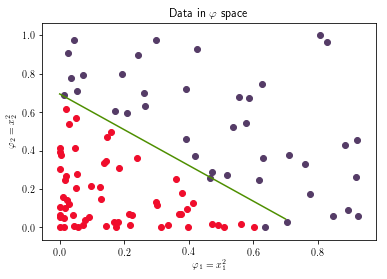

In [4]:
# Import the SVM classifier class
from sklearn.svm import SVC

# Form design matrix
Phi = np.zeros([num_points, 2])
Phi[:,0] = x[:,0]**2
Phi[:,1] = x[:,1]**2

# Fit thetas by maximizing separability and distance from data
svm_model = SVC(kernel='linear')
svm_model.fit(Phi, c)
theta_svm = svm_model.coef_[0]

# the constant term is trained separately in sklearn
theta_0 = svm_model.intercept_ 

# plot points classified as positive
plt.scatter(phi_1[I_pos], phi_2[I_pos])

# plot points classified as negative
plt.scatter(phi_1[I_neg], phi_2[I_neg])

# plot the separating hyperplane in phi space
phi_1_plot = np.linspace(0, 0.7, 10)
phi_2_plot = -(theta_0 + theta_svm[0]*phi_1_plot)/theta_svm[1]
plt.plot(phi_1_plot, phi_2_plot, color='#4E8F00')

plt.xlabel(r'$\varphi_1 = x_1^2$')
plt.ylabel(r'$\varphi_2 = x_2^2$')
plt.title(r'Data in $\varphi$ space')


In [5]:
print(theta_0)
print(theta_svm)

[-2.45503261]
[3.28575102 3.5357726 ]


# Plot separating level set in x-space

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Data in X space')

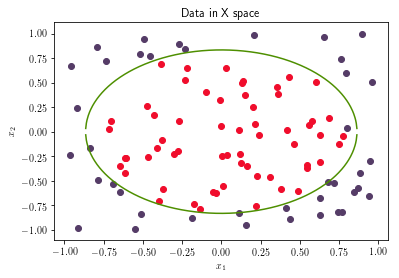

In [6]:
x1_plot = np.linspace(-1, 1, 500)
# taking square roots yields two solutions
x2_plot_1 = np.sqrt(-(theta_0 + theta_svm[0]*x1_plot**2)/theta_svm[1])
x2_plot_2 = -np.sqrt(-(theta_0 + theta_svm[0]*x1_plot**2)/theta_svm[1])

# plot points classified as positive
plt.scatter(x[I_pos,0], x[I_pos,1])

# plot points classified as negative
plt.scatter(x[I_neg,0], x[I_neg,1])

# Plot level set g(x) = 0
plt.plot(x1_plot, x2_plot_1, color='#4E8F00')
plt.plot(x1_plot, x2_plot_2, color='#4E8F00')

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Data in X space')

## Kernel SVM

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

svm_model = SVC(kernel='poly', degree = 2)
svm_model.fit(x[:80,:], c[:80])
c_model = svm_model.predict(x[80:])

precision = precision_score(c[80:], c_model)
recall = recall_score(c[80:], c_model)
accuracy = accuracy_score(c[80:], c_model)
f1 = f1_score(c[80:], c_model)

print(accuracy)
print(precision)
print(recall)
print(f1)


0.65
1.0
0.3
0.4615384615384615


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Pick the best value for regularization parameter 'C':

In [ ]:
accuracy = np.zeros(50)
C_vals = np.logspace(-1, 2, len(accuracy))

for i, C in enumerate(C_vals):
    svm_model = SVC(kernel='poly', degree = 2, gamma='auto', C = C)
    svm_model.fit(x[:80,:], c[:80])
    c_model = svm_model.predict(x[80:])
    accuracy[i] = accuracy_score(c[80:], c_model)

plt.plot(C_vals, accuracy)
plt.xscale('log')
plt.xlabel("Regularization Parameter")
plt.ylabel("Accuracy")
plt.grid()
plt.title('Optimizing regularization parameter through validation')

Text(0.5, 1.0, 'Optimizing regularization parameter through validation')

In [13]:
i_max = np.argmax(accuracy)
svm_model = SVC(kernel='poly', degree = 2, gamma='auto', C = C_vals[i_max])
svm_model.fit(x[:80,:], c[:80])
c_model = svm_model.predict(x[80:])

precision = precision_score(c[80:], c_model)
recall = recall_score(c[80:], c_model)
accuracy = accuracy_score(c[80:], c_model)
f1 = f1_score(c[80:], c_model)

print(accuracy)
print(precision)
print(recall)
print(f1)

0.95
1.0
0.9
0.9473684210526316


## The linear model and it's zero level set used for classification

In [ ]:
# get ready to do a 3d plot
%matplotlib qt 
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# plot the actual linear function, and not just its level set
x1_plot = np.linspace(-1, 1, 10)
x2_plot = np.linspace(-1, 1, 10)

# a whole bunch of stuff needed to make 3d plots
X1_plot, X2_plot = np.meshgrid(x1_plot, x2_plot)
y_plot = np.array([theta_0 + theta_svm[0]*x1**2  + theta_svm[1]*x2**2\
              for x1,x2 in zip(np.ravel(X1_plot), np.ravel(X2_plot))])
Y_plot = y_plot.reshape(X1_plot.shape)


# plot
ax.plot_surface(X1_plot, X2_plot, Y_plot)
ax.contour(X1_plot, X2_plot, Y_plot, 6, linestyles="solid", offset=-5)
ax.set_zlim([4, -5])

# plot points classified as positive
ax.scatter(x[I_pos,0], x[I_pos,1], -5*np.ones(np.sum(I_pos)))

# plot points classified as negative
ax.scatter(x[I_neg,0], x[I_neg,1], -5*np.ones(np.sum(I_neg)))

# SVM and class imbalance

In [ ]:
# plot in notebook again
%matplotlib inline
mpl.rcParams['figure.dpi']= 200

# what about data from last time?
data = np.loadtxt('lec15.txt')
num_points = data.shape[0]
x = data[:, 0:2]
c = data[:, 2]

# Use the same training data as last time
num_train = int(num_points*0.8*0.8)
x_train = x[0:num_train]
c_train = c[0:num_train]

# Here we'll use Phi = x (so that phi_1 = x_1, phi_2 = x_2)
mu_x = np.mean(x_train)
sig_x = np.std(x_train)

# fit the model
svm_model = SVC(kernel='linear')
svm_model.fit((x_train-mu_x)/sig_x, c_train)

# Make plot
COLORS = ['#F00D2C', '#553C67']
c_color = []
for i in range(num_points):
    c_color.append(COLORS[int(c[i])])

# Color plot
x1_plot = np.linspace(0, 1, 500)
x2_plot = np.linspace(0, 1.3, 500)
xx1, xx2 = np.meshgrid(x1_plot, x2_plot)

x_plot = np.array([xx1.ravel(), xx2.ravel()]).transpose()
# predict at every point in plane (i.e. x_plot)
c_plot = svm_model.predict((x_plot-mu_x)/sig_x)
c_plot = c_plot.reshape(xx1.shape)

from matplotlib.colors import ListedColormap
plt.pcolormesh(xx1, xx2, c_plot, cmap=ListedColormap(COLORS))
plt.scatter(x[:,0], x[:,1], marker='^', edgecolors='k', linewidth=0.5, c=c_color)
plt.xlabel('X1')
plt.ylabel('X2')